<a href="https://colab.research.google.com/github/AbhinavLakkapragada/NLP_Project/blob/main/nlp_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

warnings.filterwarnings('ignore')

In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']

In [ ]:
train = pd.read_csv("/content/twitter_training.csv.zip",names=col_names)
train.sample(5)

,ID,Entity,Sentiment,Content
37610,5249,Hearthstone,Positive,I'm in Star Trek.
46526,11984,Verizon,Positive,It's so wonderful!
41191,1469,Battlefield,Negative,Disrespect to Call of Duty.
54090,2093,CallOfDuty,Positive,I'm just sitting here grinding the absolute ba...
21034,12800,WorldOfCraft,Positive,Fuck away final over fantasy 16. World of warc...


In [ ]:
test = pd.read_csv("/content/twitter_validation.csv",names=col_names)
test.sample(5)

,ID,Entity,Sentiment,Content
144,2218,CallOfDuty,Irrelevant,I'm not even a part of @CallofDuty community b...
912,8305,Microsoft,Negative,Suspicion and Anger Towards Microsoft Rises Af...
881,10162,PlayerUnknownsBattlegrounds(PUBG),Positive,Is our illiterate community thinks PUBG game i...
520,8846,Nvidia,Neutral,New video on now go check it out here we go ag...
476,6894,johnson&johnson,Negative,EXTRAORDINARY: Podcast about Deanna Berg's fig...


In [ ]:
train.shape

(74682, 4)

In [ ]:
# Data Preprocessing

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# checking values
train.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [ ]:
train.dropna(subset=['Content'], inplace=True)

In [ ]:
# checking duplicate values
train.duplicated().sum()

2340

In [ ]:
# replacing irrelavant with neutral
train['Sentiment'] = train['Sentiment'].replace('Irrelevant', 'Neutral')
test['Sentiment'] = test['Sentiment'].replace('Irrelevant', 'Neutral')

In [ ]:
train.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# dropping duplicates
train = train.drop_duplicates(keep='first')

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.shape

(71656, 4)

In [ ]:
train.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Exploratory Data Analysis (EDA)

train['Sentiment'].value_counts()

Neutral     30245
Negative    21698
Positive    19713
Name: Sentiment, dtype: int64

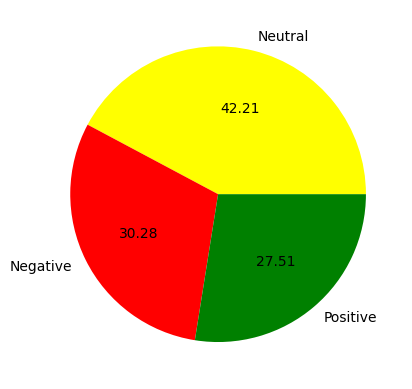

In [ ]:
plt.pie(train['Sentiment'].value_counts(), labels=['Neutral','Negative','Positive'],autopct='%0.2f',colors=['yellow','red','green'])
plt.show()

In [ ]:
# Data is imbalanced
# hence we will give more importance to accuracy than precision

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train['num_char'] = train['Content'].apply(len) # no of characters of each text

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


In [ ]:
# number of words
train['num_words'] = train['Content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char,num_words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13


In [ ]:
# number of sentences
train['num_sentences'] = train['Content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char,num_words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13


In [ ]:
# data description
train[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,71656.000000,71656.000000,71656.000000
mean,110.538127,22.972535,1.954491
std,79.409848,17.163287,1.638269
min,1.000000,0.000000,0.000000
25%,49.000000,10.000000,1.000000
50%,93.000000,19.000000,1.000000
75%,155.000000,32.000000,2.000000
max,957.000000,198.000000,33.000000


<Axes: xlabel='num_char', ylabel='Count'>

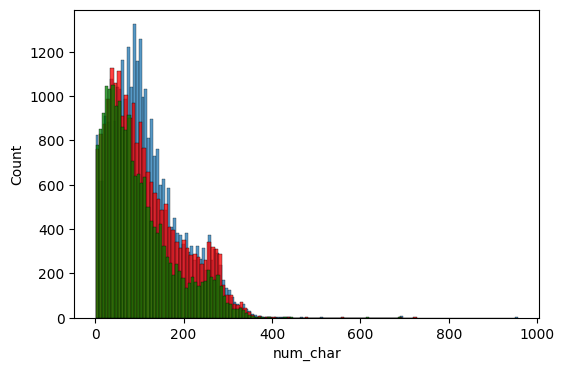

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(train[train['Sentiment'] == 'Neutral']['num_char'])
sns.histplot(train[train['Sentiment'] == 'Negative']['num_char'], color='red')
sns.histplot(train[train['Sentiment'] == 'Positive']['num_char'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

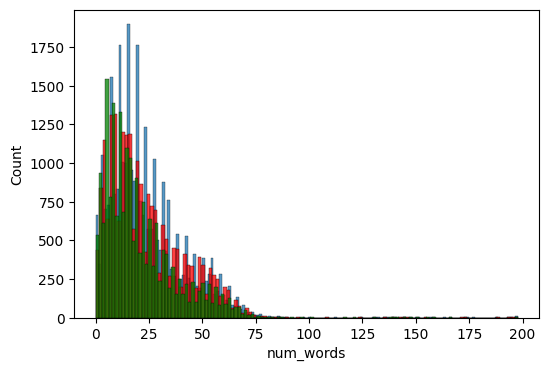

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(train[train['Sentiment'] == 'Neutral']['num_words'])
sns.histplot(train[train['Sentiment'] == 'Negative']['num_words'], color='red')
sns.histplot(train[train['Sentiment'] == 'Positive']['num_words'], color='green')

In [ ]:
df=train.drop(['ID','Entity'],axis=1)

In [ ]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences
0,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,Positive,I am coming to the borders and I will kill you...,51,13,1
2,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,Positive,im coming on borderlands and i will murder you...,51,11,1
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sentiment'],drop_first=True)
df_encoded['Sentiment_Neutral'] = df_encoded['Sentiment_Neutral'].astype(int)
df_encoded['Sentiment_Positive'] = df_encoded['Sentiment_Positive'].astype(int)

In [ ]:
df_encoded=df_encoded.drop(['Content'],axis=1)

<Axes: >

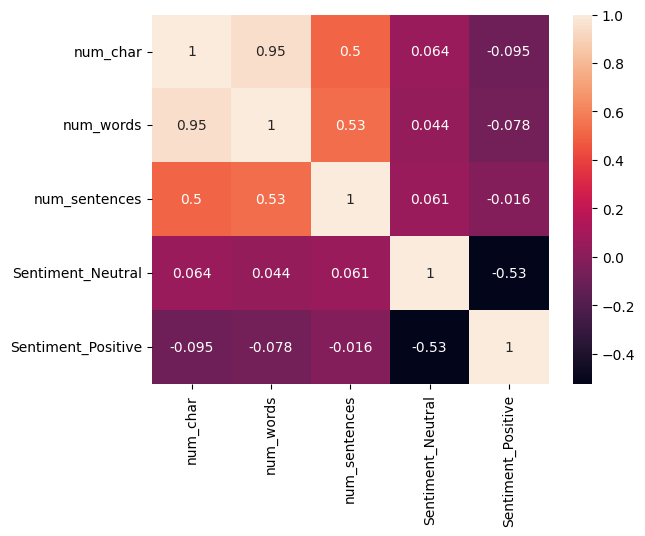

In [ ]:
sns.heatmap(df_encoded.corr(),annot=True)

In [ ]:
# Text Preprocessing
# Except for removing stopwords, we are doing the rest

import string # for punctuation
# string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] # list is mutable, so you have to do cloning, else if you clear y, text gets cleared too
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
# Perform Label encoding
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [ ]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences,sentiment_encoded
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,2
1,Positive,I am coming to the borders and I will kill you...,51,13,1,2
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,2
3,Positive,im coming on borderlands and i will murder you...,51,11,1,2
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,2


In [ ]:
df['transformed_text'] = df['Content'].apply(transform_text)

In [ ]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences,sentiment_encoded,transformed_text
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,2,im get on borderland and i will murder you all
1,Positive,I am coming to the borders and I will kill you...,51,13,1,2,i am come to the border and i will kill you all
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,2,im get on borderland and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,51,11,1,2,im come on borderland and i will murder you all
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,2,im get on borderland 2 and i will murder you m...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')

In [ ]:
condition = (df['sentiment_encoded']==0)

# Generate the word cloud for "transformed_text" when both conditions are met
wcNeutral = WordCloud().generate(df[condition]['transformed_text'].str.cat(sep=" "))

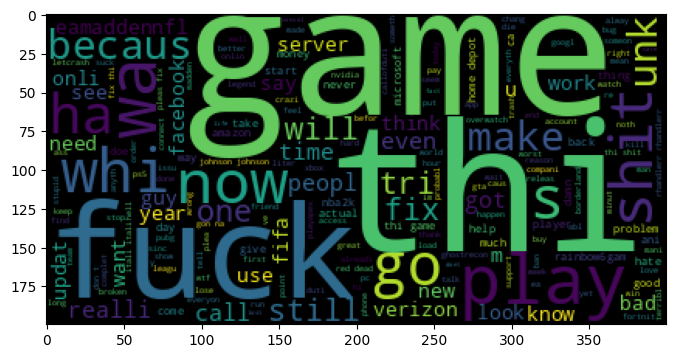

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wcNeutral)

In [ ]:
condition = (df['sentiment_encoded']==1)

# Generate the word cloud for "transformed_text" when both conditions are met
wcNegative = WordCloud().generate(df[condition]['transformed_text'].str.cat(sep=" "))

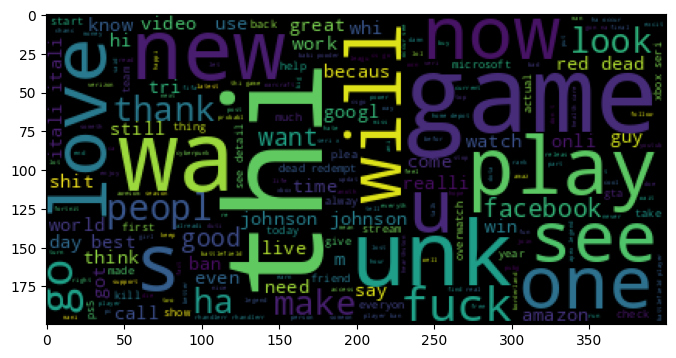

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wcNegative)

In [ ]:
condition = (df['sentiment_encoded']==2)

# Generate the word cloud for "transformed_text" when both conditions are met
wcPositive = WordCloud().generate(df[condition]['transformed_text'].str.cat(sep=" "))

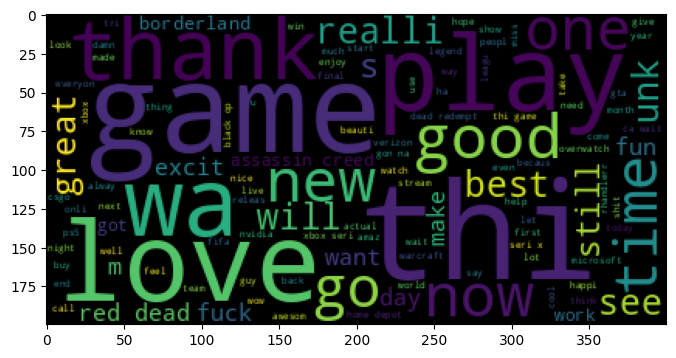

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wcPositive)

In [ ]:
df=df.drop(['Sentiment'],axis=1)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
print(X.shape)

(71656, 3000)


In [ ]:
y = df['sentiment_encoded'].values

In [ ]:
print(y.shape)

(71656,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

bnb = BernoulliNB()

In [ ]:
# TFIDF Vectorizer - BernoulliNB
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(precision_score(y_test,y_pred,average=None))

[0.68820005 0.68734202 0.53514019]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a pipeline with just the logistic regression classifier
pipeline = Pipeline([
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# defining the hyperparameter grid for logistic regression (C parameter)
params = {'lr_clf__C': [1, 5, 10]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print('Optimized Hyperparameters:', grid_cv_pipe.best_params_)

pred = grid_cv_pipe.predict(X_test)
print('Optimized Accuracy Score: {0: .3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Optimized Hyperparameters: {'lr_clf__C': 10}
Optimized Accuracy Score:  0.702


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64      4391
           1       0.69      0.59      0.63      6020
           2       0.54      0.73      0.62      3921

    accuracy                           0.63     14332
   macro avg       0.64      0.64      0.63     14332
weighted avg       0.65      0.63      0.63     14332



In [ ]:
# Now we repeat it while removing the stopwords

In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']

In [ ]:
train1 = pd.read_csv("/content/twitter_training.csv.zip",names=col_names)
train1.sample(5)

,ID,Entity,Sentiment,Content
16624,9648,PlayStation5(PS5),Irrelevant,An Can't ever wait to see what you guys do wit...
61913,5013,GrandTheftAuto(GTA),Positive,No other feeling than killing the person who k...
37059,8356,Microsoft,Positive,Wow...
16208,3174,Dota2,Negative,words cannot explain how much i hate dragon ag...
38243,5356,Hearthstone,Negative,blizzard patch notes say we can preorder to th...


In [ ]:
train = pd.read_csv("/content/twitter_training.csv.zip",names=col_names)
train.sample(5)

,ID,Entity,Sentiment,Content
63189,7631,MaddenNFL,Negative,GIVE IT THE ABILITIES TO MAKE SIM FOOTBALL TES...
47268,5710,HomeDepot,Neutral,"Is it bad, hypothetically speaking of course, ..."
5475,143,Amazon,Neutral,Sage Apothecary Lemon Cream Purpose Sanitizer ...
54173,2106,CallOfDuty,Negative,see
65468,6811,johnson&johnson,Neutral,"After awarding $750 million in Talc's lawsuit,..."


In [ ]:
test = pd.read_csv("/content/twitter_training.csv.zip",names=col_names)
test.sample(5)

,ID,Entity,Sentiment,Content
3924,1878,CallOfDutyBlackopsColdWar,Positive,I just realized look how fucking big that map ...
19016,12458,WorldOfCraft,Neutral,Fucking hell how is it 130am I've been playing...
28506,506,ApexLegends,Neutral,haha everytime expect the unexpected even in t...
44362,11620,Verizon,Neutral,Verizon Wireless customers have faced service ...
18566,9982,PlayStation5(PS5),Irrelevant,The Square really likes to give us everything ...


In [ ]:
train.shape

(74682, 4)

In [ ]:
# Data Preprocessing

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# checking values
train.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [ ]:
train.dropna(subset=['Content'], inplace=True)

In [ ]:
# checking duplicate values
train.duplicated().sum()

2340

In [ ]:
# replacing irrelavant with neutral
train['Sentiment'] = train['Sentiment'].replace('Irrelevant', 'Neutral')
test['Sentiment'] = test['Sentiment'].replace('Irrelevant', 'Neutral')

In [ ]:
train.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# dropping duplicates
train = train.drop_duplicates(keep='first')

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.shape

(71656, 4)

In [ ]:
train.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Exploratory Data Analysis (EDA)

train['Sentiment'].value_counts()

Neutral     30245
Negative    21698
Positive    19713
Name: Sentiment, dtype: int64

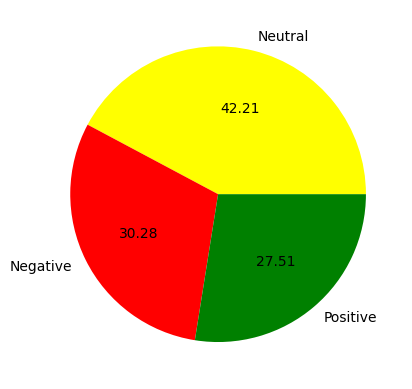

In [ ]:
plt.pie(train['Sentiment'].value_counts(), labels=['Neutral','Negative','Positive'],autopct='%0.2f',colors=['yellow','red','green'])
plt.show()

In [ ]:
# Data is imbalanced
# hence we will give more importance to accuracy than precision

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train['num_char'] = train['Content'].apply(len) # no of characters of each text

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


In [ ]:
# number of words
train['num_words'] = train['Content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char,num_words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13


In [ ]:
# number of sentences
train['num_sentences'] = train['Content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
train.head()

,ID,Entity,Sentiment,Content,num_char,num_words,num_sentences
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [ ]:
# data description
train[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,71656.000000,71656.000000,71656.000000
mean,110.538127,22.972535,1.954491
std,79.409848,17.163287,1.638269
min,1.000000,0.000000,0.000000
25%,49.000000,10.000000,1.000000
50%,93.000000,19.000000,1.000000
75%,155.000000,32.000000,2.000000
max,957.000000,198.000000,33.000000


<Axes: xlabel='num_char', ylabel='Count'>

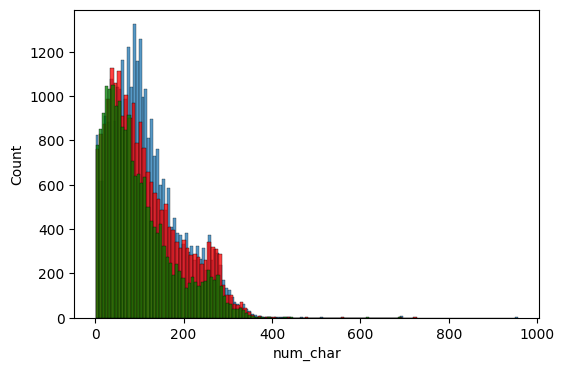

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(train[train['Sentiment'] == 'Neutral']['num_char'])
sns.histplot(train[train['Sentiment'] == 'Negative']['num_char'], color='red')
sns.histplot(train[train['Sentiment'] == 'Positive']['num_char'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

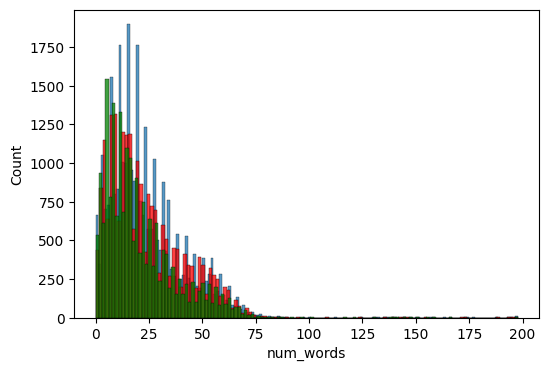

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(train[train['Sentiment'] == 'Neutral']['num_words'])
sns.histplot(train[train['Sentiment'] == 'Negative']['num_words'], color='red')
sns.histplot(train[train['Sentiment'] == 'Positive']['num_words'], color='green')

In [ ]:
df=train.drop(['ID','Entity'],axis=1)

In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sentiment'],drop_first=True)
df_encoded['Sentiment_Neutral'] = df_encoded['Sentiment_Neutral'].astype(int)
df_encoded['Sentiment_Positive'] = df_encoded['Sentiment_Positive'].astype(int)

In [ ]:
df_encoded=df_encoded.drop(['Content'],axis=1)

<Axes: >

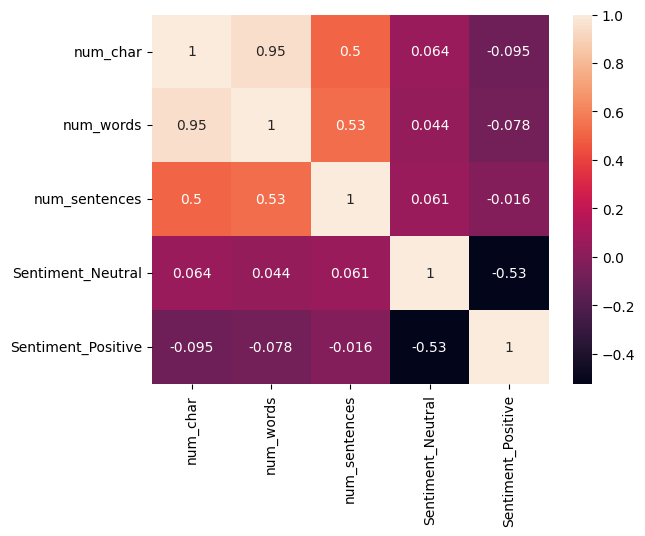

In [ ]:
sns.heatmap(df_encoded.corr(),annot=True)

In [ ]:
# Text Preprocessing

from nltk.corpus import stopwords
import string # for punctuation
# string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] # list is mutable, so you have to do cloning, else if you clear y, text gets cleared too
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
# Perform Label encoding
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [ ]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences,sentiment_encoded
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,2
1,Positive,I am coming to the borders and I will kill you...,51,13,1,2
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,2
3,Positive,im coming on borderlands and i will murder you...,51,11,1,2
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,2


In [ ]:
import nltk


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('stopwords', download_dir='/path/to/nltk_data')


[nltk_data] Downloading package stopwords to /path/to/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['transformed_text'] = df['Content'].apply(transform_text)

In [ ]:
df.head()

,Sentiment,Content,num_char,num_words,num_sentences,sentiment_encoded
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,2
1,Positive,I am coming to the borders and I will kill you...,51,13,1,2
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,2
3,Positive,im coming on borderlands and i will murder you...,51,11,1,2
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,2


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')

In [ ]:
condition = (df['sentiment_encoded']==0)

# Generate the word cloud for "transformed_text" when both conditions are met
wcNeutral = WordCloud().generate(df[condition]['transformed_text'].str.cat(sep=" "))

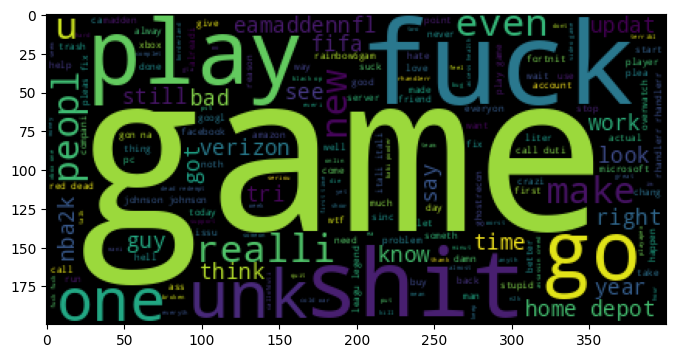

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wcNeutral)

In [ ]:
condition = (df['sentiment_encoded']==1)

# Generate the word cloud for "transformed_text" when both conditions are met
wcNegative = WordCloud().generate(df[condition]['transformed_text'].str.cat(sep=" "))

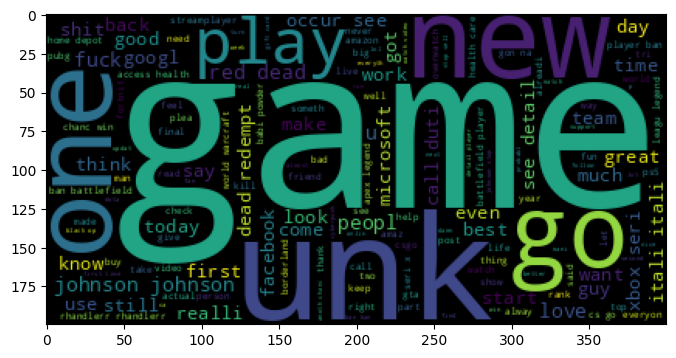

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wcNegative)

In [ ]:
condition = (df['sentiment_encoded']==2)

# Generate the word cloud for "transformed_text" when both conditions are met
wcPositive = WordCloud().generate(df[condition]['transformed_text'].str.cat(sep=" "))

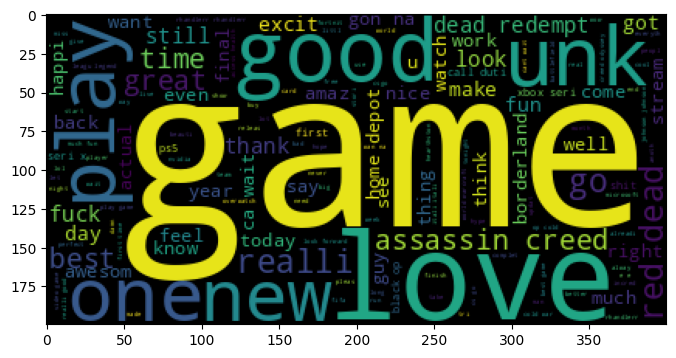

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wcPositive)

In [ ]:
df=df.drop(['Sentiment'],axis=1)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
print(X.shape)

(71656, 3000)


In [ ]:
y = df['sentiment_encoded'].values

In [ ]:
print(y.shape)

(71656,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

bnb = BernoulliNB()

In [ ]:
# TFIDF Vectorizer - BernoulliNB
bnb.fit(X_train1, y_train1)
y_pred1 = bnb.predict(X_test1)
print(precision_score(y_test1,y_pred1,average=None))

[0.71203919 0.68436743 0.55072749]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a pipeline with just the logistic regression classifier
pipeline = Pipeline([
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# defining the hyperparameter grid for logistic regression (C parameter)
params = {'lr_clf__C': [1, 5, 10]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train1, y_train1)
print('Optimized Hyperparameters:', grid_cv_pipe.best_params_)

pred1 = grid_cv_pipe.predict(X_test1)
print('Optimized Accuracy Score: {0: .3f}'.format(accuracy_score(y_test1, pred1)))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Optimized Hyperparameters: {'lr_clf__C': 10}
Optimized Accuracy Score:  0.696


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      4391
           1       0.68      0.61      0.65      6020
           2       0.55      0.71      0.62      3921

    accuracy                           0.64     14332
   macro avg       0.65      0.65      0.65     14332
weighted avg       0.66      0.64      0.65     14332

